In [7]:
import tensorflow as tf
import numpy as np

import pandas as pd
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
%matplotlib inline

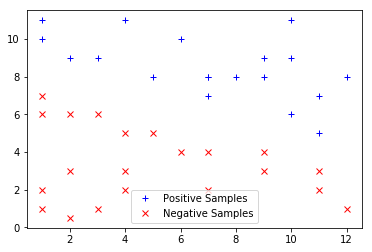

In [8]:
data = pd.read_csv('svm_data.csv', names=['x1', 'x2', 'y'])
data_pos = data[data.y == 1]
data_neg = data[data.y == -1]

plt.plot(data_pos.x1, data_pos.x2, 'b+', label='Positive Samples')
plt.plot(data_neg.x1, data_neg.x2, 'rx', label='Negative Samples')
plt.legend()
plt.show()

# Converting all -1 values to 0 for logistic regression
data.y[data.y == -1] = 0

In [9]:
# Preaparing training data
train_x = data[['x1', 'x2']]
train_y = data['y']

X = tf.placeholder(dtype=tf.float32, shape=[None, 2])
labels = tf.placeholder(dtype=tf.float32, shape=[None, 1])

# Parameters
W = tf.Variable(tf.truncated_normal(shape=[2, 1], stddev=0.01), dtype=tf.float32, name='Weights')
b = tf.Variable(tf.zeros([1]), dtype=tf.float32, name='Bias')

# Constants
learning_rate = 0.01
epochs = 1500
display_batch = 50
n_samples = data.shape[0]

In [10]:
# Computing the logits
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.sigmoid(logits)

# Defining the logistic regression loss function ~ Cross Entropy
loss_fn = tf.reduce_mean((-labels * tf.log(hypothesis)) - ((1 - labels) * tf.log(1 - hypothesis)))

# Defining the Gradient Descent Optimizer and the training operation
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss_fn)

# Defining the initializer operation
init_op = tf.global_variables_initializer()

In [11]:
# Starting a session
with tf.Session() as sess:
    sess.run(init_op)

    # Training loop
    for epoch in range(epochs):
        count = 0
        while count < n_samples:
            feed_dict = {
                X: train_x.iloc[count, :].values.reshape(1, 2),
                labels: train_y.iloc[count].reshape(1, 1)
            }
            sess.run(train_op, feed_dict=feed_dict)
            count += 1
        
        if epoch % display_batch == 0:
            feed_dict = {
                X: train_x,
                labels: train_y.values.reshape(n_samples, 1)
            }
            
            print('Loss at epoch %d: %g' % (epoch, sess.run(loss_fn, feed_dict=feed_dict)))
    
    weights_learnt = W.eval()
    bias_learnt = b.eval()

Loss at epoch 0: 0.622004
Loss at epoch 50: 0.390254
Loss at epoch 100: 0.297842
Loss at epoch 150: 0.245838
Loss at epoch 200: 0.212694
Loss at epoch 250: 0.189496
Loss at epoch 300: 0.171883
Loss at epoch 350: 0.157688
Loss at epoch 400: 0.145804
Loss at epoch 450: 0.135615
Loss at epoch 500: 0.126748
Loss at epoch 550: 0.118948
Loss at epoch 600: 0.112035
Loss at epoch 650: 0.105868
Loss at epoch 700: 0.100338
Loss at epoch 750: 0.095354
Loss at epoch 800: 0.0908428
Loss at epoch 850: 0.086743
Loss at epoch 900: 0.0830026
Loss at epoch 950: 0.0795785
Loss at epoch 1000: 0.0764332
Loss at epoch 1050: 0.0735341
Loss at epoch 1100: 0.0708547
Loss at epoch 1150: 0.0683713
Loss at epoch 1200: 0.0660642
Loss at epoch 1250: 0.0639154
Loss at epoch 1300: 0.0619092
Loss at epoch 1350: 0.0600314
Loss at epoch 1400: 0.0582708
Loss at epoch 1450: 0.0566158


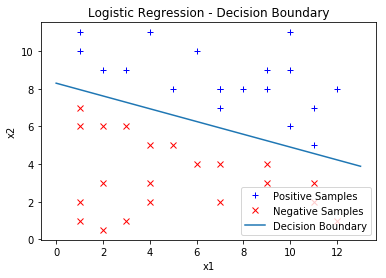

In [13]:
plot_x = [min(train_x.iloc[:, 0])-1,  max(train_x.iloc[:, 0])+1]
plot_y = (-1 / weights_learnt[1]) * (np.multiply(weights_learnt[0], plot_x) + bias_learnt[0])

plt.plot(data_pos.x1, data_pos.x2, 'b+', label='Positive Samples')
plt.plot(data_neg.x1, data_neg.x2, 'rx', label='Negative Samples')
plt.plot(plot_x, plot_y, '-', label='Decision Boundary')
plt.title('Logistic Regression - Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()